# Full name: Kozhakhmet Nagashybaiuly
# ID: 20B030502

# Final Project: Breast Cancer Wisconsin (Diagnostic) Data Set

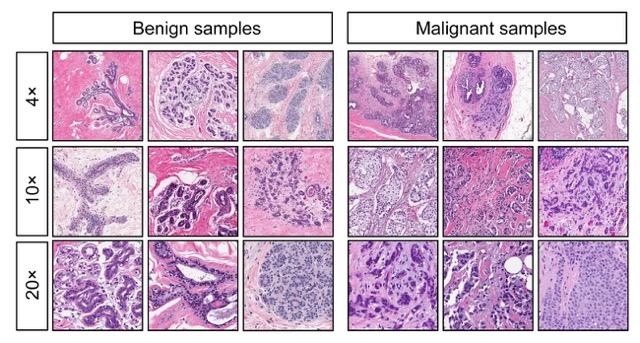


# Dataset information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

This database is also available through the UW CS ftp server: 
ftp ftp.cs.wisc.edu 
cd math-prog/cpo-dataset/machine-learn/WDBC/


* Dataset Characteristics: Multivariate
* Attribute Characteristics: Real
* Attribute Characteristics: Classification
* Number of Instances: 569
* Number of Attributes: 32
* Missing Values: No


# Column names and meanings:

* id: ID number
* diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
* radius_mean: mean of distances from center to points on the perimeter
* texture_mean: standard deviation of gray-scale values
* perimeter_mean: mean size of the core tumor
* area_mean: area of the tumor
* smoothness_mean: mean of local variation in radius lengths
* compactness_mean: mean of perimeter^2 / area - 1.0
* concavity_mean: mean of severity of concave portions of the contour
* concave_points_mean: mean for number of concave portions of the contour
* symmetry_mean
* fractal_dimension_mean: mean for "coastline approximation" - 1
* radius_se: standard error for the mean of distances from center to points on the perimeter
* texture_se: standard error for standard deviation of gray-scale values
* perimeter_se
* area_se
* smoothness_se: standard error for local variation in radius lengths
* compactness_se: standard error for perimeter^2 / area - 1.0
* concavity_se: standard error for severity of concave portions of the contour
* concave_points_se: standard error for number of concave portions of the contour
* symmetry_se
* fractal_dimension_se: standard error for "coastline approximation" - 1
* radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
* texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
* perimeter_worst
* area_worst
* smoothness_worst: "worst" or largest mean value for local variation in radius lengths
* compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
* concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
* concave_points_worst: "worst" or largest mean value for number of concave portions of the contour
* symmetry_worst
* fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Cleaning

In [2]:
data = pd.read_csv('/Users/kozhahmet/Desktop/Fall semester 2022-2023/Math. Found. of ML/Projects/Final/Breast Cancer, Final Project/Breast Cancer, Final project.csv')

In [3]:
data.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [4]:
data.shape

(569, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Removing id and unnamed: 32 column which is not necessary for our model.

data = data.drop(['id','Unnamed: 32'], axis = 1)

In [8]:
data.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   
6         M        18.25         19.98          119.60     1040.0   
7         M        13.71         20.83           90.20      577.9   
8         M        13.00         21.82           87.50      519.8   
9         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   
5         0.2087  ...         15.47          23.75           103.40   
6         0.1794  ...         22.88          27.66           153.20   
7         0.2196  ...         17.06          28.14           110.60   
8         0.2350  ...         15.49          30.73           106.20   
9         0.2030  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9                0.2210          0.4366                  0.20750  

[10 rows x 31 columns]

In [9]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [10]:
# As our dataset is balanced (around 60-40 ratio), there is no need to balance our data.

data['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [11]:
# Mapping our target variable to 0 and 1.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [12]:
data.diagnosis.value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

<AxesSubplot:>

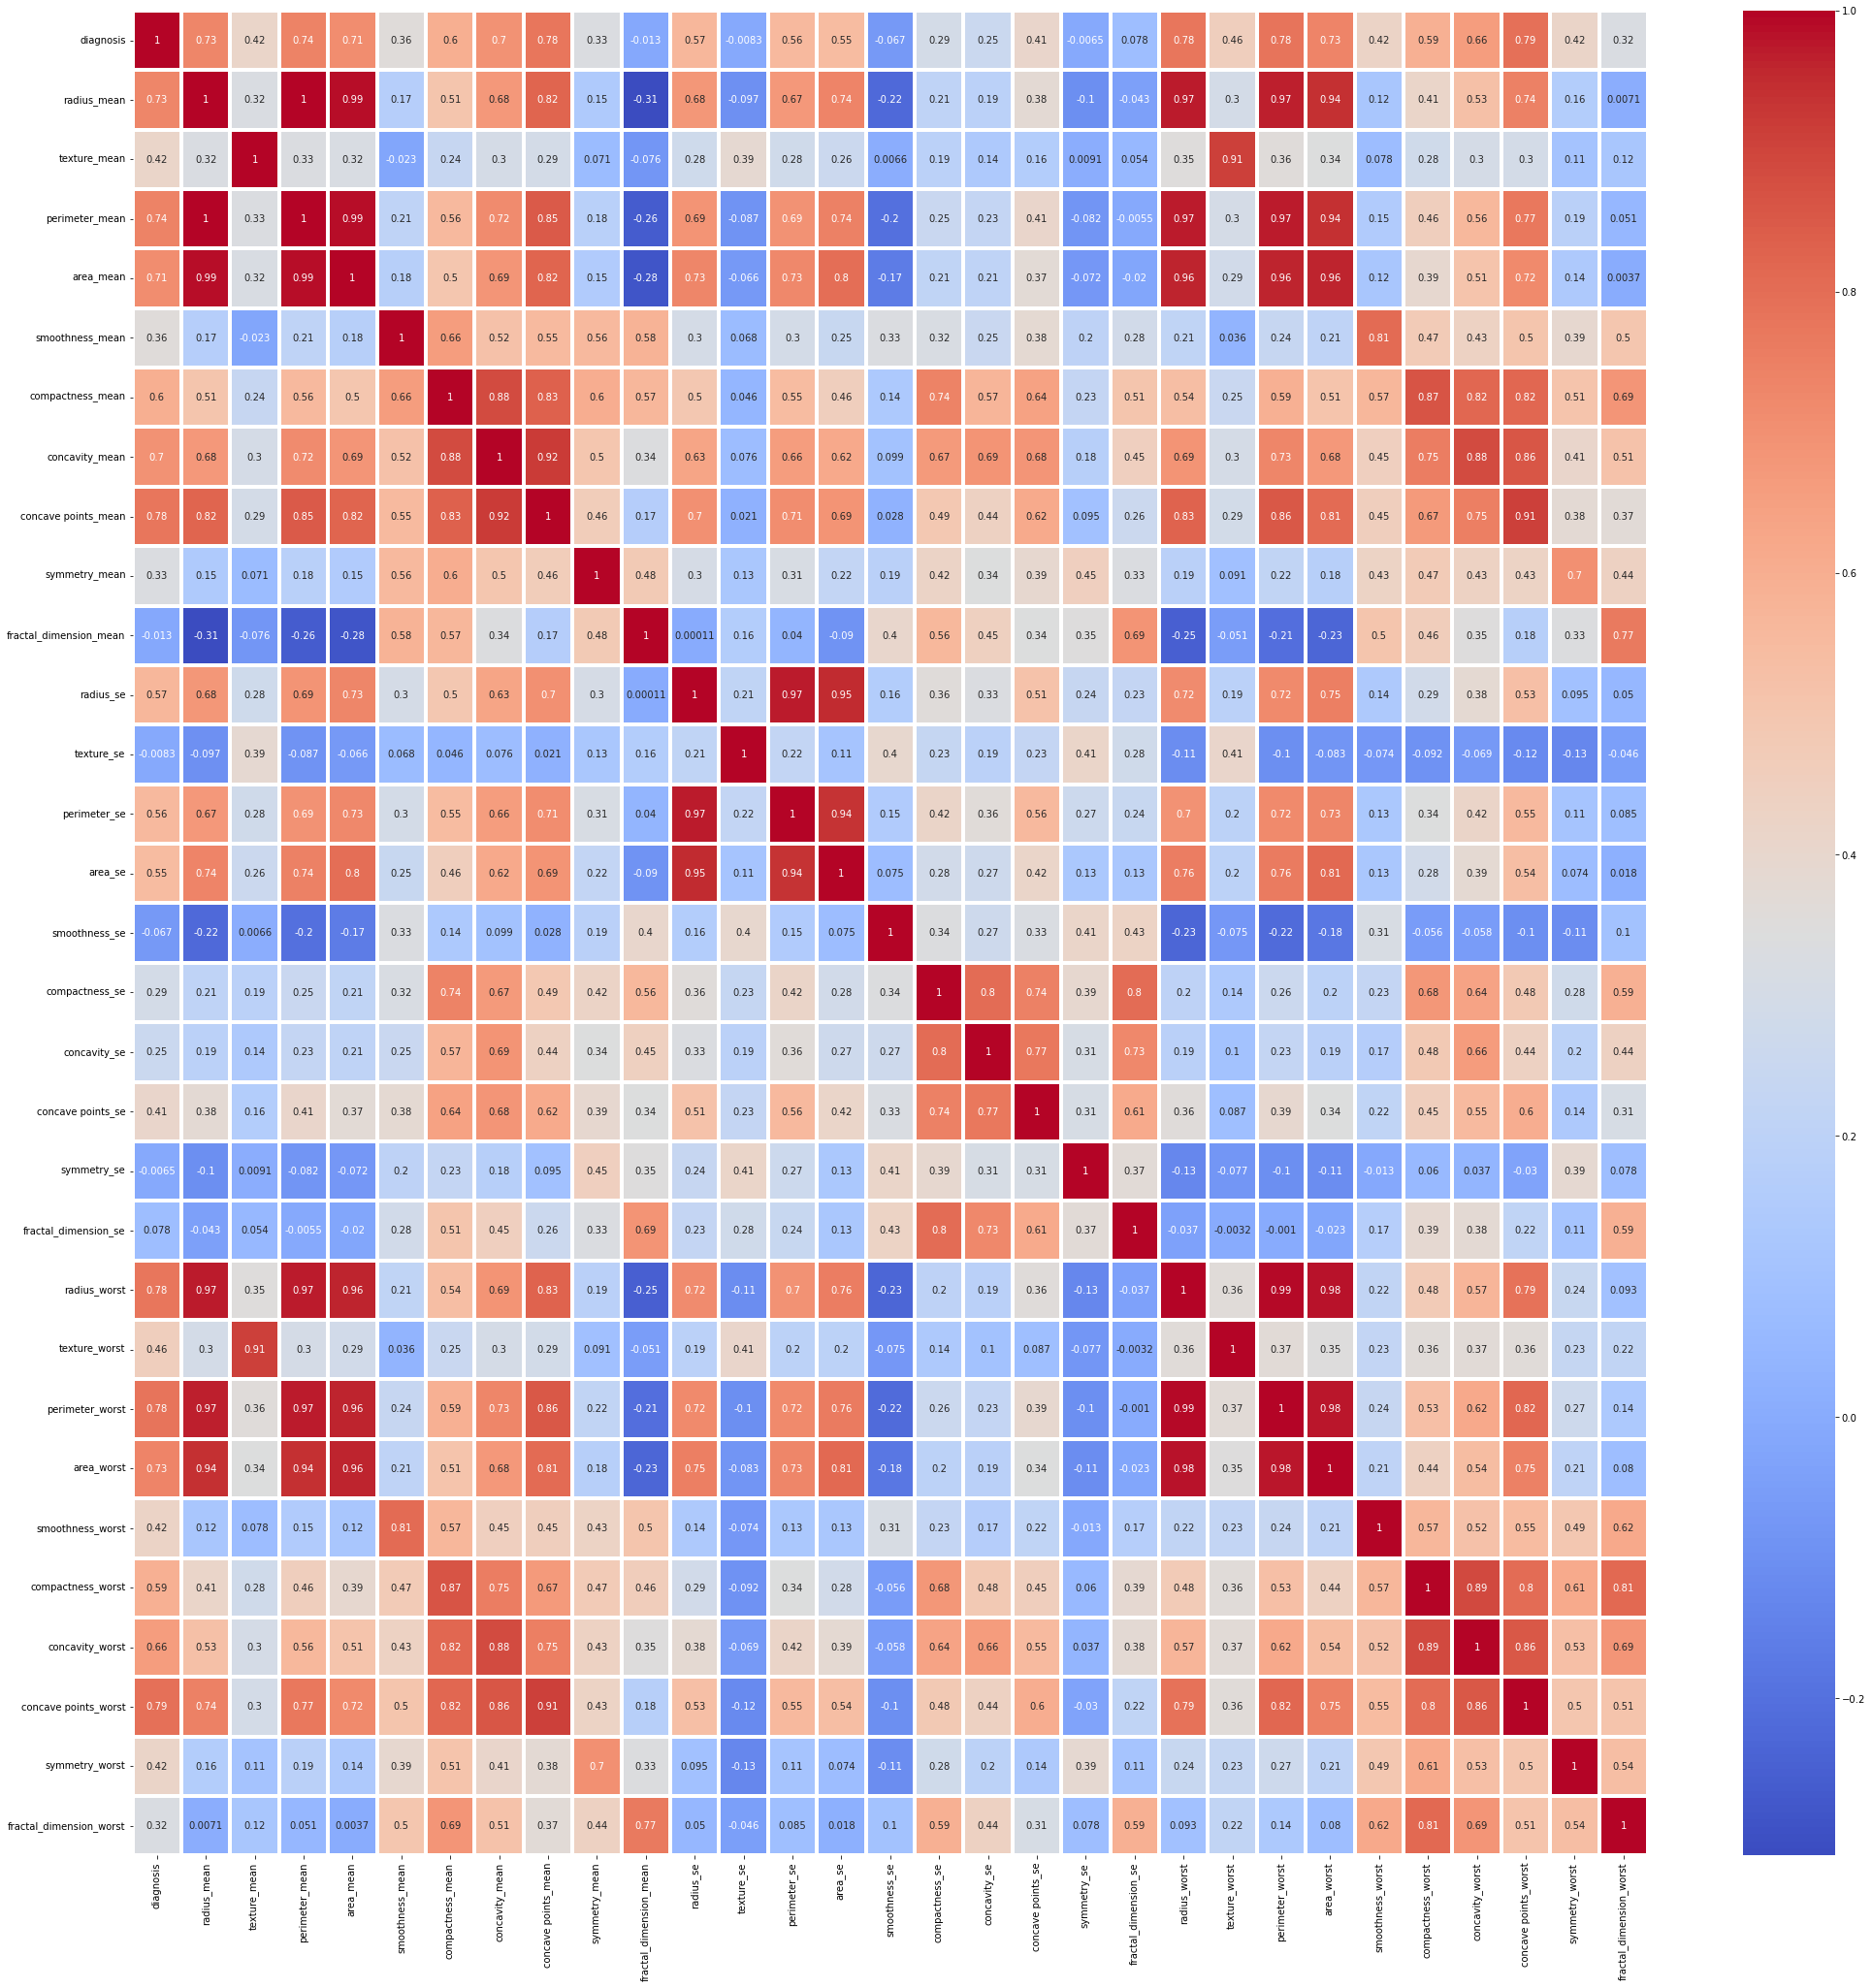

In [13]:
# Finding correlation among features using sns's heatmap.

plt.figure(figsize=(35, 35))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm', linewidths=4)

From the heatmap we can see that for our **target variable (diagnosis)** there is a higher correlation with 'concave points_worst', 'concave points_mean', 'perimeter_mean' and 'area_mean'. They will have a very good influence on our predictions.

In [14]:
# Standardizing our features except target variable.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
stand_scale = data.drop(['diagnosis'],axis = 1)
col_trans = make_column_transformer(
            (StandardScaler(), stand_scale.columns),
            remainder = 'passthrough')

In [15]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Data Analysis & Visualization

Text(0.5, 1.0, 'Distribution of Target Values')

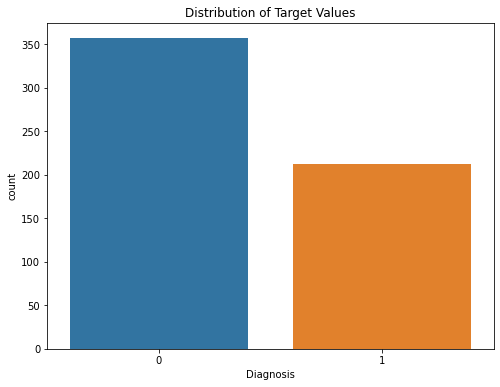

In [16]:
plt.figure(figsize=(8, 6))

sns.countplot(data['diagnosis'])
plt.xlabel("Diagnosis")
plt.title("Distribution of Target Values")

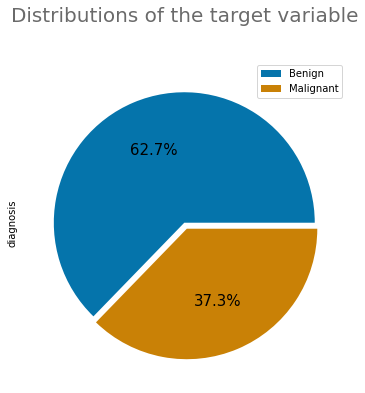

In [17]:
# Plot distribution.

plt.figure(figsize=(6, 6))

data['diagnosis'].value_counts().plot(kind='pie', labels = ['', ''], autopct = '%1.1F%%', colors = ['#0574ab','#c98106'], 
                                 explode = [0,0.05], textprops = {'fontsize':15})
plt.legend(labels=['Benign', 'Malignant'], fontsize=10)
plt.title('Distributions of the target variable\n', fontsize=20, color = '#6a6a6a', y=1.03)
plt.show()

In [18]:
px.histogram(data_frame=data, x='area_mean', color='diagnosis',color_discrete_sequence=['#0574ab', '#c98106'])

On this histogram, we can understand that if the value of the **area_mean** is higher, then there is a chance that the **tumor** is malignant.

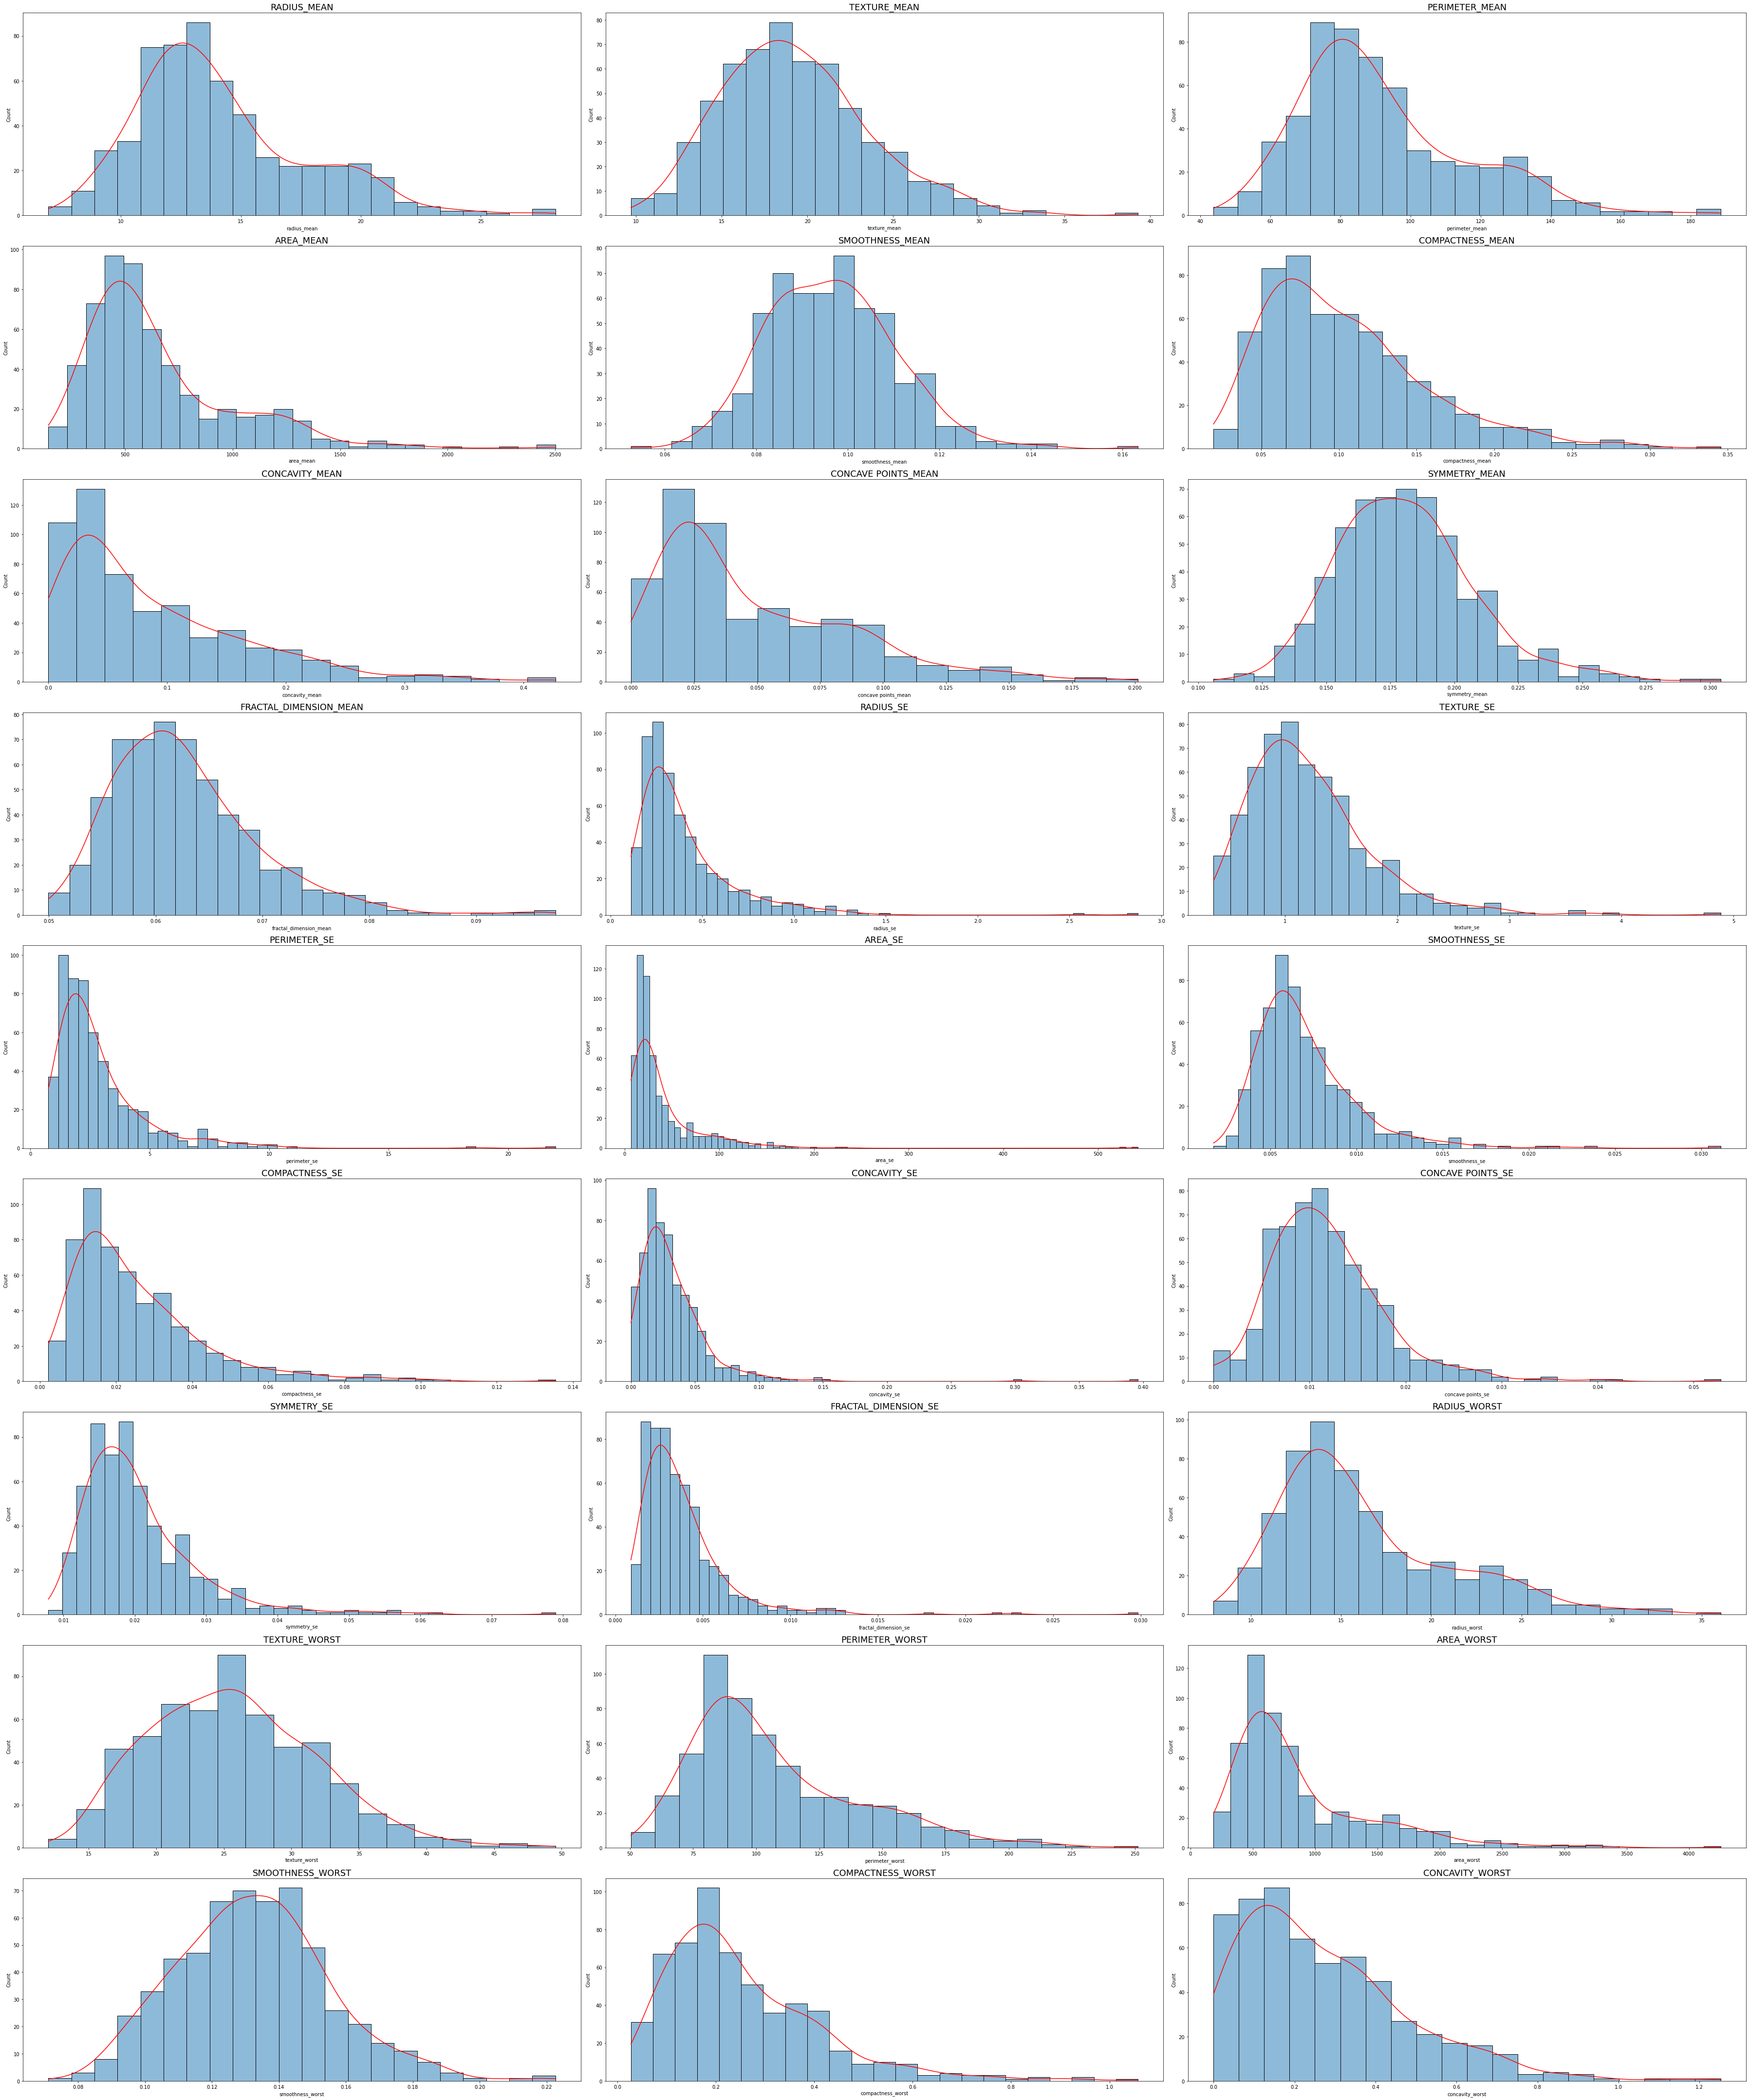

In [19]:
# Distribution of Independent Features

fig, axes = plt.subplots(9, 3, figsize=(50, 60))
feat = data.drop(columns='diagnosis').columns
f = 0
for i in range(9):
    for j in range(3):
        ax = sns.histplot(data = data, x=feat[f], ax=axes[i,j], kde=True)
        axes[i,j].set_title(feat[f].upper(),fontsize=18)
        ax.lines[0].set_color('red')
        f += 1
    
fig.tight_layout()

In this graph we can see how our independent variables distributed.

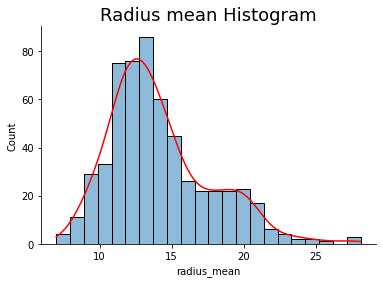

In [20]:
ax = sns.histplot(data, x='radius_mean', kde=True)
ax.lines[0].set_color('red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Radius mean' + ' Histogram', fontsize=18)
plt.show()

* Most of the tumors's **radius_mean** lies in size range of (12, 16).

<AxesSubplot:xlabel='radius_worst', ylabel='Density'>

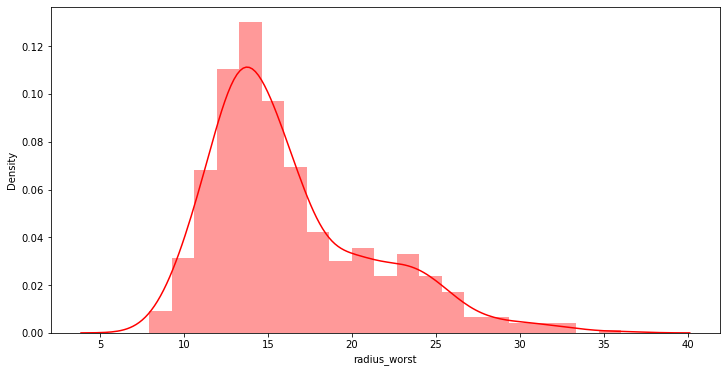

In [21]:
plt.figure(figsize=(12, 6))
sns.distplot(data['radius_worst'], kde=True, color='r')

There is a higher **radius_worst** density around a radius of 12-18, which means that there is a **worse radius** value for the average distance from the center to the perimeter points.

In [22]:
px.scatter(data_frame=data, x='radius_mean', y='texture_mean', color='diagnosis', color_discrete_sequence=['#0574ab', '#c98106'])

* So we can see very well here that radius_mean and texture_mean for malignant tumor is higher than for benign tumor.

This means that if there are more radius_mean and texture_mean values, then the probability that the tumor is malignant is higher.

# The spread of Mean Texture

The texture is an important feature for image analysis techniques that are used to classify tumors and evaluate the presence of cancer. Texture analysis can be used to detect regions of high and low density in an image, which can help to identify the presence and type of tumor.

In [23]:
fig = px.scatter(data, x='texture_mean', color='diagnosis', template='simple_white', 
                 title='The Cancer Mean Texture Spread', color_discrete_sequence=['#0574ab', '#c98106'])

fig.update_layout(xaxis_title="Mean Texture",yaxis_title=" ")

fig.show()

Here you can see that for **texture_mean of malignant tumor** is very spreaded with a large value by right side.

# The spread of Mean Compactness

Compactness is a measure of how densely packed the cells of a tumor are. It is an important factor in determining the prognosis of a cancer patient. Compactness is used to classify tumors into different types, such as solid or non-solid. Solid tumors tend to have higher compactness and can be more difficult to treat. Non-solid tumors tend to be less dense and can often be treated more easily.

In [24]:
fig = px.scatter(data,
                 x='compactness_mean', 
                 size='compactness_mean',
                 color="diagnosis",
                 labels={"mean compactness": "Mean Compactness"},
                 hover_data=['diagnosis'],
                 template='simple_white', 
                 title="The Cancer Compactness Mean")
fig.update_layout(xaxis_title="Mean Compactness",yaxis_title=" ")
fig.show()

Here you can see this **malignant tumor** has a high compactness value.

# The spread of Symmetry Error

Symmetry error is when there is an uneven or asymmetrical distribution of concave points across the tumor surface. This may indicate that the tumor is not benign, or not completely benign, but rather has malignant areas.

In [25]:
fig = px.scatter(data,
                 x='symmetry_se', 
                 size='symmetry_se',
                 color = 'diagnosis',
                 hover_data=['diagnosis'],
                 template='seaborn', 
                 labels={"symmety_se": "Symmetry Error"},
                 title="The Symmetry Error Spread")
fig.update_layout(xaxis_title="Symmetry Error",yaxis_title=" ")
fig.show()

The symmetry error of **benign and malignant** tumors is **very high spreaded** and values approximately in the range of about 0.015 - 0.03.

# The spread of Mean Concave Points

Concave points refer to the indented areas that can sometimes appear on the surface of a tumor. They are seen on a mammogram or other imaging and can be an indicator of malignancy, or cancer.

In [26]:
fig = px.scatter(data,
                 x='concave points_mean', 
                 size='concave points_mean',
                 color='diagnosis', 
                 hover_data=['diagnosis'],
                 template="simple_white", 
                 labels={"mean concave points": "Mean Concave Points"},
                 title="The Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
fig.show()

In this graph, we can see very clearly that the average concave points of malignant tumors spread with a large number of concave points by right side.

In [27]:
px.box(data_frame=data, x='area_mean', color='diagnosis', color_discrete_sequence=['#c98106', '#0574ab'])

In this graph, we can clearly see that benign tumors are four points(outliers) and malignant tumors are three points(outliers) scattered from interquartile range. And standing on the rightmost part is the maximum value of area_mean for these each box.

Malignant tumors have a large box-shaped shape, and it has a high spread in a large average value of the tumor area.

In [28]:
px.box(data_frame=data, x='symmetry_worst', color='diagnosis', color_discrete_sequence=['#c98106', '#0574ab'])

Interqurtile range for malignannt tumor is higher and its median level is also on the higher side than beningn tumor.

In [29]:
plt.figure(figsize=(12, 6))
px.scatter(data_frame=data, x='perimeter_mean', y='radius_mean', color='diagnosis', color_discrete_sequence=['#0574ab', '#c98106'])

<Figure size 864x432 with 0 Axes>

The graph shows a **good positive linear relationship** between **'perimeter_mean'** and **'radius_mean'**. Malignant tumors have a high average value of the tumor perimeter and radius.

The points of malignant tumors spread in the range of perimeter_mean[100-200] and radius_mean[17-30] values.

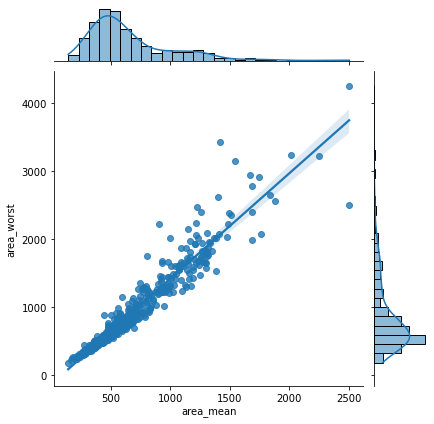

In [30]:
sns.jointplot(data=data, x='area_mean', y='area_worst', kind='reg')

The linear dependencies of **'area_mean'** and **'area_worst'** and their distribution are shown here. They have a good positive linear relationship.

<Figure size 216x72 with 0 Axes>

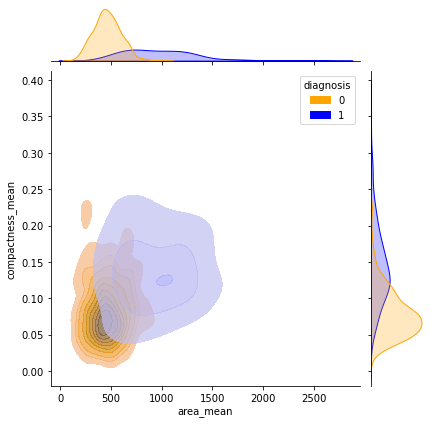

In [31]:
plt.figure(figsize=(3, 1))
sns.jointplot(data=data, x = "area_mean", y="compactness_mean", hue='diagnosis', palette=('Orange', 'Blue'), kind='kde', fill=True, alpha=0.7)
plt.show()

The spread is shown here our target variables with **'area_mean'** and **'compactness_mean'** and also shown distribution of target variables for their 'area_mean' and 'compactness_mean'. 

Small outliers are noticeable especially in benign tumors.

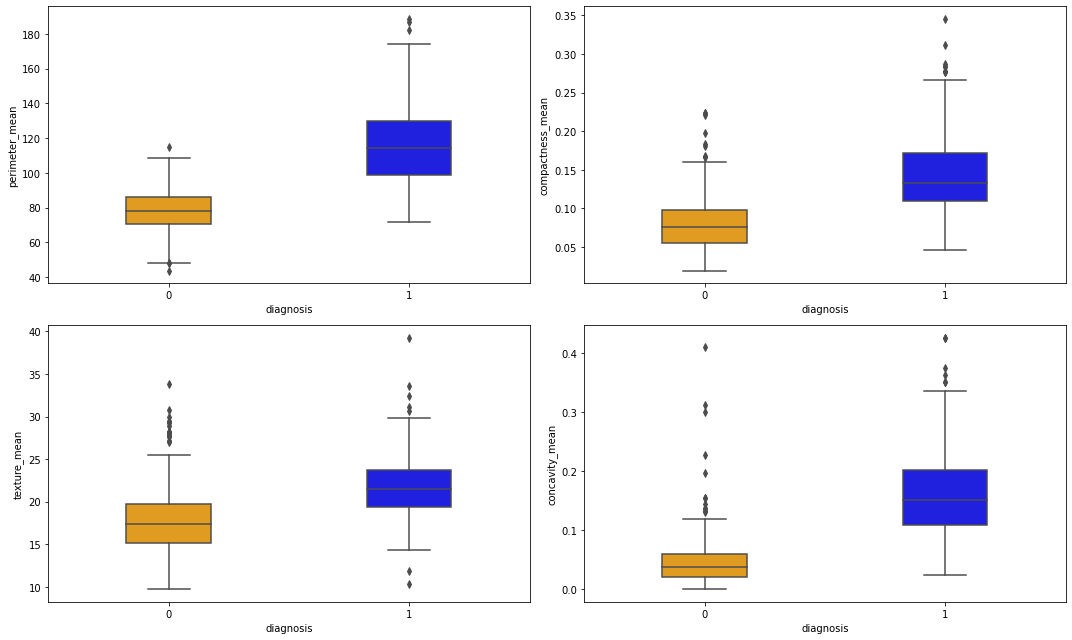

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

sns.boxplot(ax=axes[0, 0], x = data["diagnosis"], y = data["perimeter_mean"], width=0.35, palette=('Orange', 'Blue'))
sns.boxplot(ax=axes[0, 1], x = data["diagnosis"], y = data["compactness_mean"], width=0.35, palette=('Orange', 'Blue'))
sns.boxplot(ax=axes[1, 0], x = data["diagnosis"], y = data["texture_mean"], width=0.35, palette=('Orange','Blue'))
sns.boxplot(ax=axes[1, 1], x = data["diagnosis"], y = data["concavity_mean"], width=0.35, palette=('Orange', 'Blue'))

fig.tight_layout()

It can be seen here that malignant tumors have high values in all these four graphs.

It is clearly visible that there are many outliers from interquartile range in benign tumors from the last graph 'concavity_mean'.

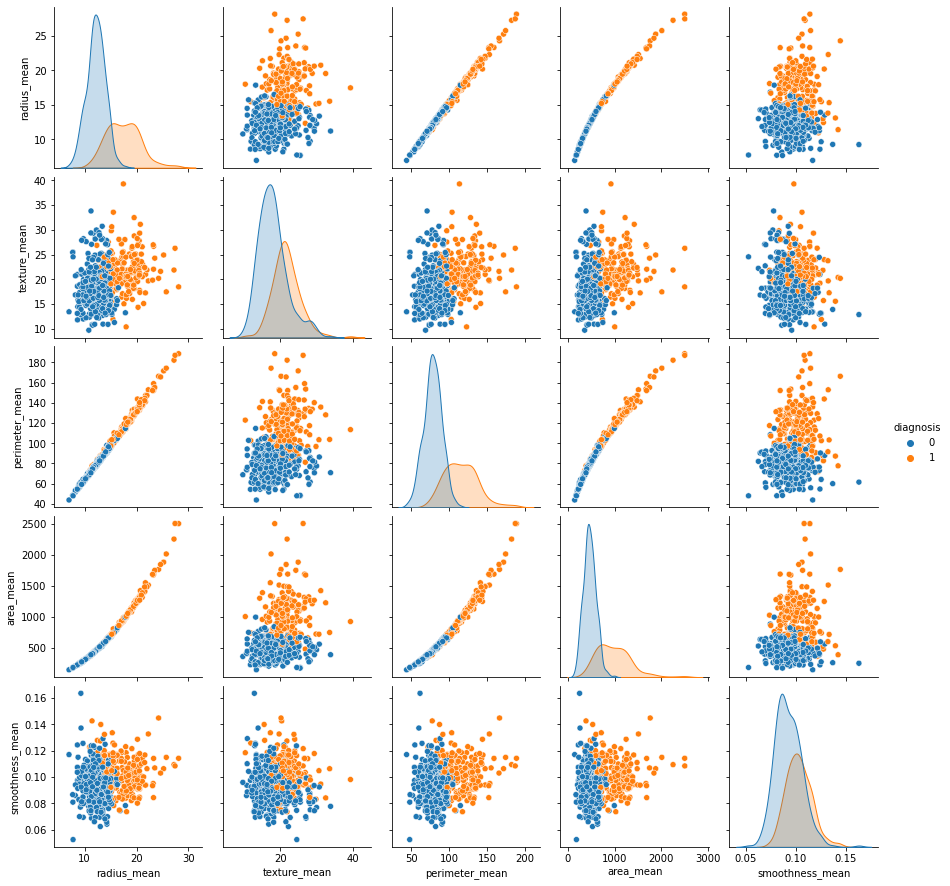

In [33]:
sns.pairplot(data.iloc[:,0:6], hue='diagnosis')

In here repaired all the five independent variables, plotted their correlation between them and plotted the distribution of the data.

These graphs can be seen that the **'perimeter_mean' with 'radius_mean'** is quite direct and a good linear dependency.

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
col_trans.fit_transform(X_train)

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

## Classification Models

### 1. Logistic Regression

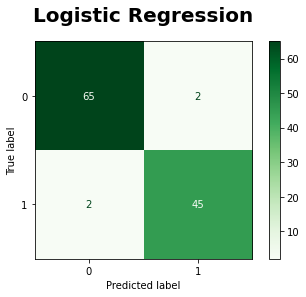

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.964912   0.957447  0.957447  0.957447

In [36]:
lr_model = LogisticRegression(solver='lbfgs')

lr_model = make_pipeline(col_trans, lr_model)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append({'Model':"Logistic Regression", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)


cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Logistic Regression", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [37]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 96.4912%.


### 2. K Nearest Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    pipe = make_pipeline(col_trans, knn_classifier)
    knn_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

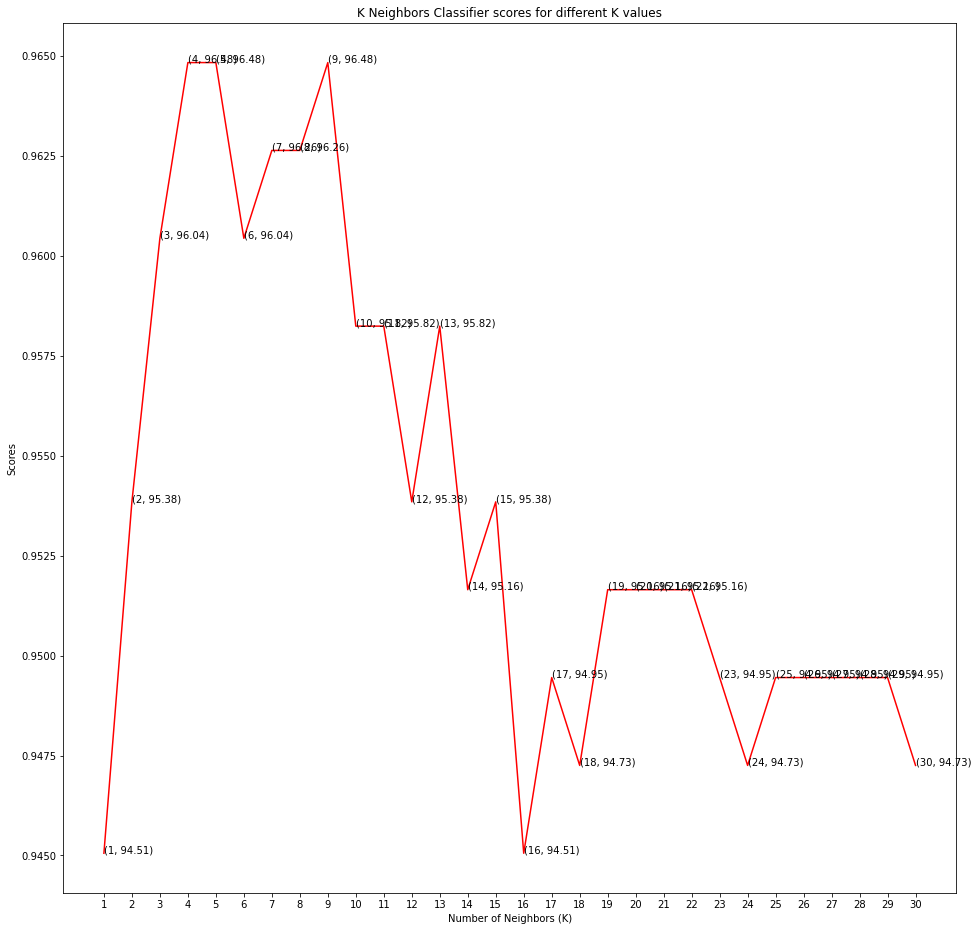

In [39]:
plt.figure(figsize=(16,16))
plt.plot([k for k in range(1, 31)], knn_scores, color = 'red')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1]*100,2)))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

**Let's find the best K's number for model using this graph.**

Text(0.5, 1.0, 'Error Rate vs K- value')

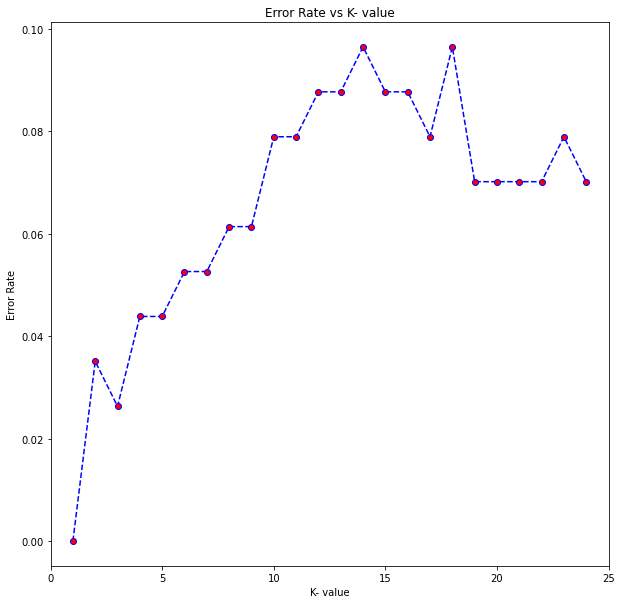

In [40]:
error_rate = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_test,y_test)
    predi = knn.predict(X_test)
    error_rate.append(np.mean(predi!=y_test))
    

plt.figure(figsize = (10,10))
plt.plot(range(1, 25),error_rate,ls = '--',color = 'blue',marker = 'o',markerfacecolor = 'red')
plt.xlabel("K- value")
plt.ylabel("Error Rate")
plt.xlim((0, 25))
plt.title("Error Rate vs K- value")

For comparison, we can investigate the behavior of the model at different values of K. The model repeats all values of K in the range from 1 to 25. 

The graph above shows that the error is zero at K = 1, but that for all other values of "K" the error rate increases, but begins to decrease at K = 20.

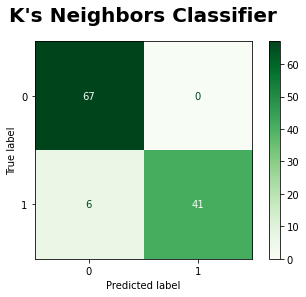

Model  Accuracy  Precision   Recall  F1 Score
1  K's Neighbors Classifier  0.947368        1.0  0.87234  0.931818

In [41]:
KN_model = KNeighborsClassifier(n_neighbors = 4)

KN_model = make_pipeline(col_trans, KN_model)
KN_model.fit(X_train, y_train)

y_pred = KN_model.predict(X_test)

results_df = results_df.append({'Model':"K's Neighbors Classifier", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)


cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("K's Neighbors Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [42]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 94.7368%.


### 3. Support Vector Classifier (SVC)

In [43]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    pipe = make_pipeline(col_trans,svc_classifier)
    svc_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

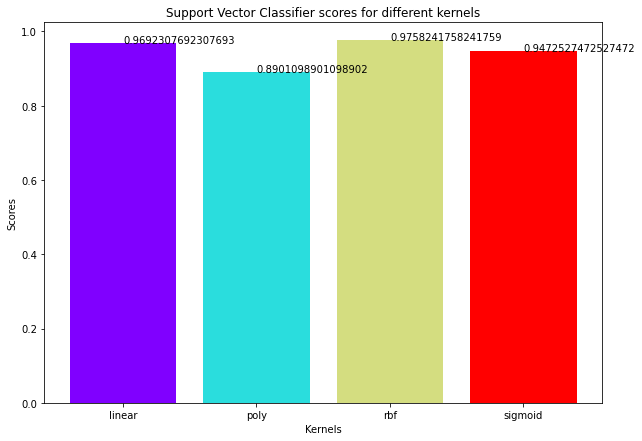

In [44]:
from matplotlib.cm import rainbow
import numpy as np
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

# Radial basis function, RBF

**Let's find the best kernels for model using this graph.**

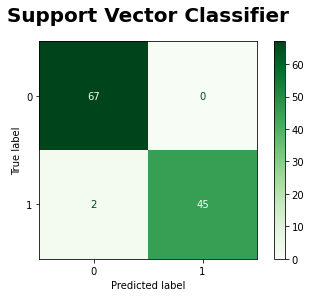

Model  Accuracy  Precision    Recall  F1 Score
2  Support Vector Classifier  0.982456        1.0  0.957447  0.978261

In [45]:
svc_model = SVC(kernel = kernels[2])

svc_model = make_pipeline(col_trans, svc_model)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

results_df = results_df.append({'Model':"Support Vector Classifier", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)


cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Support Vector Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [46]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 98.2456%.


### 4. Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    pipe = make_pipeline(col_trans,dt_classifier)
    dt_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

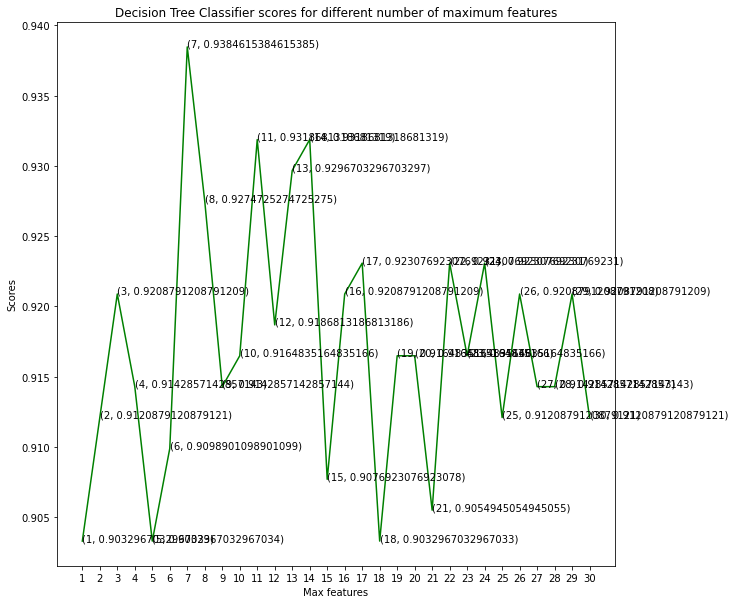

In [48]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

**Let's find the max_features for model using this graph.**

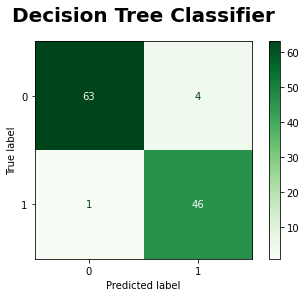

Model  Accuracy  Precision    Recall  F1 Score
3  Decision Tree Classifier   0.95614       0.92  0.978723  0.948454

In [49]:
DTC_model = DecisionTreeClassifier(max_features = 4, random_state = 0)

DTC_model = make_pipeline(col_trans, DTC_model)
DTC_model.fit(X_train, y_train)

y_pred = DTC_model.predict(X_test)

results_df = results_df.append({'Model':"Decision Tree Classifier", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)


cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Decision Tree Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [50]:
print('Accuracy score {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score 95.6140%.


### 5. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    pipe = make_pipeline(col_trans,rf_classifier)
    rf_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

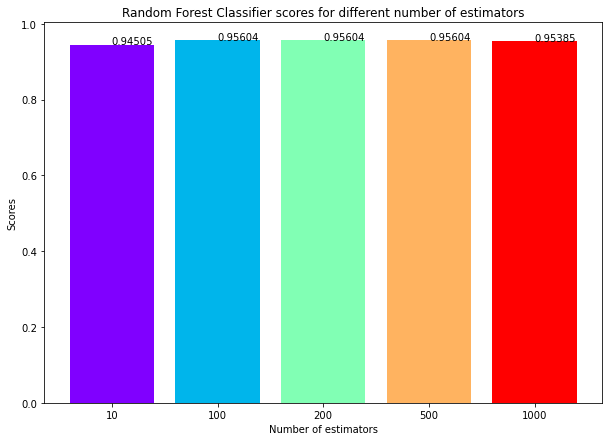

In [52]:
plt.figure(figsize=(10,7))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],5))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

**Let's find the best number of estimators for model using this graph.**

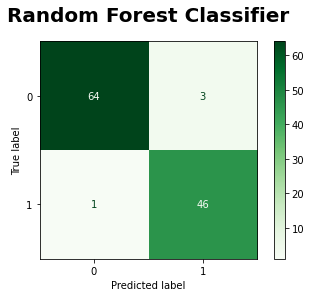

Model  Accuracy  Precision    Recall  F1 Score
4  Random Forest Classifier  0.964912   0.938776  0.978723  0.958333

In [53]:
RFC_model = RandomForestClassifier(n_estimators = 1000, random_state = 0)

RFC_model = make_pipeline(col_trans, RFC_model)
RFC_model.fit(X_train, y_train)

y_pred = RFC_model.predict(X_test)

results_df = results_df.append({'Model':"Random Forest Classifier", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Random Forest Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [54]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 96.4912%.


# 6. AdaBoost Classifier

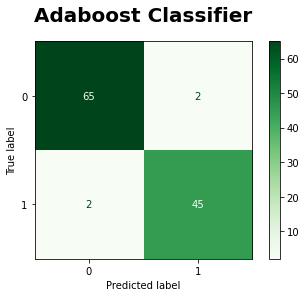

Model  Accuracy  Precision    Recall  F1 Score
5  AdaBoost Classifier  0.964912   0.957447  0.957447  0.957447

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada_model= AdaBoostClassifier()
ada_model = make_pipeline(col_trans, ada_model)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

results_df = results_df.append({'Model':"AdaBoost Classifier", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_ada.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Adaboost Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [56]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 96.4912%.


# 7. GradientBoostingClassifier

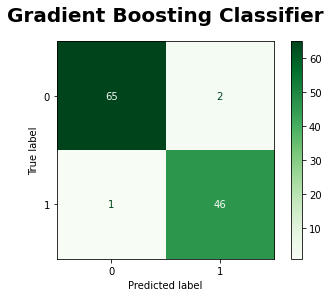

Model  Accuracy  Precision    Recall  F1 Score
6  Gradient Boosting Classifier  0.973684   0.958333  0.978723  0.968421

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model= GradientBoostingClassifier()
gb_model = make_pipeline(col_trans, gb_model)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

results_df = results_df.append({'Model':"Gradient Boosting Classifier", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Gradient Boosting Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [58]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 97.3684%.


# 8. BaggingClassifier

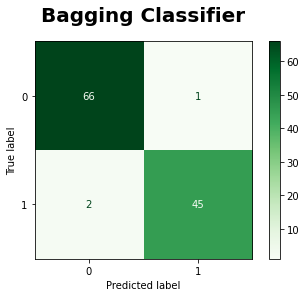

Model  Accuracy  Precision    Recall  F1 Score
7  Bagging Classifier  0.973684   0.978261  0.957447  0.967742

In [59]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(n_estimators=100, random_state=0)
bag_model = make_pipeline(col_trans, bag_model)
bag_model.fit(X_train, y_train)

y_pred = bag_model.predict(X_test)

results_df = results_df.append({'Model':"Bagging Classifier", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_ada.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Bagging Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [60]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 97.3684%.


# 9. Bootstrapping

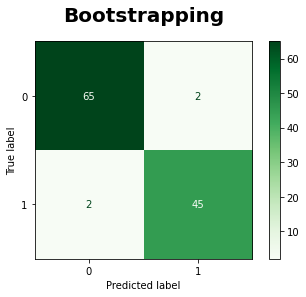

Model  Accuracy  Precision    Recall  F1 Score
8  Bootstrapping  0.964912   0.957447  0.957447  0.957447

In [61]:
# Number of iterations for bootstrapping

bootstrap_iteration = 90
accuracy = []
prec = []
recall = []
f1 = []

rfcl = RandomForestClassifier(n_estimators = 1000)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
acc_RF=acc_RF*100

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    pr = metrics.precision_score(y_test, y_pred)
    rcl = metrics.recall_score(y_test, y_pred)
    F1 = metrics.f1_score(y_test, y_pred)
    
    accuracy.append(acc)
    prec.append(pr)
    recall.append(rcl)
    f1.append(F1)

accuracy = np.array(accuracy)
prec = np.array(prec)
recall = np.array(recall)
f1 = np.array(f1)

results_df = results_df.append({'Model':"Bootstrapping", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_ada.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Bootstrapping", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [62]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 96.4912%.


# 10. Random Search CV

Fitting 3 folds for each of 5 candidates, totalling 15 fits


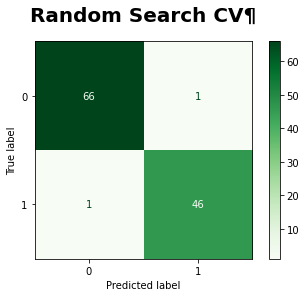

Model  Accuracy  Precision    Recall  F1 Score
9  Random Search CV  0.982456   0.978723  0.978723  0.978723

In [63]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=0)
rf_random_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random_model = make_pipeline(col_trans, rf_random_model)
rf_random_model.fit(X_train, y_train)

y_pred = rf_random_model.predict(X_test)

results_df = results_df.append({'Model':"Random Search CV", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_ada.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Random Search CV¶", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [64]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 98.2456%.


# 11. Grid Search CV¶

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train);
# grid_search.best_params_

best_grid = grid_search.best_estimator_
Grid_search_cv=best_grid.score(X_test, y_test)
print(Grid_search_cv)

0.956140350877193


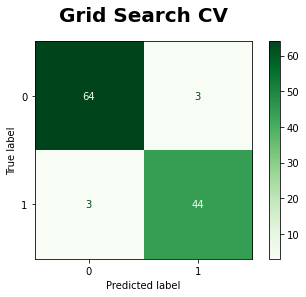

Model  Accuracy  Precision   Recall  F1 Score
10  Grid Search CV  0.947368    0.93617  0.93617   0.93617

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

grid_search_model = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search_model = make_pipeline(col_trans, grid_search_model)
grid_search_model.fit(X_train, y_train)

y_pred = grid_search_model.predict(X_test)

results_df = results_df.append({'Model':"Grid Search CV", 'Accuracy':accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred), 'Recall':metrics.recall_score(y_test, y_pred), 'F1 Score':metrics.f1_score(y_test, y_pred)}, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Grid Search CV", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.tail(1)

In [67]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 94.7368%.


# Let's find the best model prediction

In [68]:
results_df

Model  Accuracy  Precision    Recall  F1 Score
0            Logistic Regression  0.964912   0.957447  0.957447  0.957447
1       K's Neighbors Classifier  0.947368   1.000000  0.872340  0.931818
2      Support Vector Classifier  0.982456   1.000000  0.957447  0.978261
3       Decision Tree Classifier  0.956140   0.920000  0.978723  0.948454
4       Random Forest Classifier  0.964912   0.938776  0.978723  0.958333
5            AdaBoost Classifier  0.964912   0.957447  0.957447  0.957447
6   Gradient Boosting Classifier  0.973684   0.958333  0.978723  0.968421
7             Bagging Classifier  0.973684   0.978261  0.957447  0.967742
8                  Bootstrapping  0.964912   0.957447  0.957447  0.957447
9               Random Search CV  0.982456   0.978723  0.978723  0.978723
10                Grid Search CV  0.947368   0.936170  0.936170  0.936170

In [69]:
results_df[results_df['Accuracy'] == results_df['Accuracy'].max()]

Model  Accuracy  Precision    Recall  F1 Score
2  Support Vector Classifier  0.982456   1.000000  0.957447  0.978261
9           Random Search CV  0.982456   0.978723  0.978723  0.978723

So, for our dataset, the best model prediction should be **Support Vector Classifier**.

# Support Vector Classifier is the best for Breast Cancer Data Set

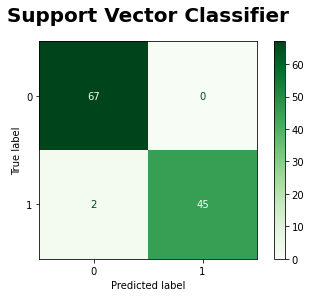

Model        Support Vector Classifier
Accuracy                      0.982456
Precision                          1.0
Recall                        0.957447
F1 Score                      0.978261
Name: 2, dtype: object

In [70]:
svc_model = SVC(kernel = kernels[2])

svc_model = make_pipeline(col_trans, svc_model)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_gb.plot(cmap=plt.cm.Greens,values_format='g')
plt.title("Support Vector Classifier", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df.iloc[2]

In [71]:
print('Accuracy score: {:.4f}%.'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score: 98.2456%.


# Conclusion

I should conclude that in the first phase of this project part, I conducted exploratory data analysis to learn more about each of the 30 original variables and how they might be related to cancer. The image shows how the attributes we used helped us distinguish between benign and malignant data. The most noticeable performance change occurred during the feature selection stage. Choosing to keep certain features comes with significant tradeoffs, which are not always obvious. The data visualization techniques I described above, as well as principal component analysis, made it easier to select the most useful features.

The 11 prediction models I used were Logistic Regression, K's Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, AdaBoost Classifier, Gradient Boosting Classifier, Bagging Classifier, Bootstrapping, Random Search CV, and Grid Search CV.

**The Support Vector Classifier had the highest accuracy of all of these models with accuracy score 98.2456%.**

In reality, using machine learning models to classify this data set is quite simple. The goal of this project, however, was for me to learn about data mining by analyzing each feature, selecting features for my model, and applying various machine learning models. I'm hoping you'll enjoy this project.

# What were changed?

Comparison with the endterm part in this final project, more things have changed. In this part of the project, analysis and forecasting has been strengthened. So, I'm trying to write the main changes that have been made to this project.

* Pretty good functions were used to analyze and visualize the dataset. It was shown pretty nice features.
* It have fixed mistakes made in the endterm part of project.
* It have added 6 prediction model (AdaBoost Classifier, Gradient Boosting Classifier, Bagging Classifier, Bootstrapping, Random Search CV, and Grid Search CV).
* Confusion Matrix Display was added.
* Conclusion part was added for this part of project.

# Thank you for your attention! Have a nice day!